In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
# leitura do dataset e renomeação de algumas colunas para evitar problemas de manipulação.
df = pd.read_excel('base2.xlsx')
df.rename(index=str, columns={"País":"Pais", "Liberdade de negócio":"Liberdade de negocio",
                              "Liberdade de comércio exterior":"Liberdade de comercio exterior",
                              "Liberdade Monetária": "Liberdade Monetaria",
                              "Eficácia Judicial":"Eficacia Judicial"}, inplace=True)
df.head()

,continente,Pais,direitos de propriedade,Eficacia Judicial,Liberdade Fiscal,Gasto do Governo,Liberdade de negocio,Liberdade de trabalho,Liberdade Monetaria,Liberdade de comercio exterior,Liberdade de Investimento,Liberdade Financeira
0,Africa,Mauritius,70,51,92.1,81.9,78.2,72.3,75.4,87.9,90,70
1,Africa,Botswana,70,61,79.5,65.1,69.0,69.8,72.0,79.7,70,70
2,Africa,Rwanda,30,50,80.4,75.9,65.6,80.3,75.5,78.0,65,40
3,Africa,Cape Verde,70,55,77.9,65.4,58.9,40.3,78.0,66.9,65,60
4,Africa,Madagascar,40,30,90.0,94.6,63.5,47.4,74.9,74.6,55,50


In [4]:
# descrição geral das colunas do conjunto de dados.
df.describe()

,direitos de propriedade,Eficacia Judicial,Liberdade Fiscal,Gasto do Governo,Liberdade de negocio,Liberdade de trabalho,Liberdade Monetaria,Liberdade de comercio exterior,Liberdade de Investimento,Liberdade Financeira
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,43.579545,40.767045,77.682955,61.418182,64.943750,60.943182,74.089205,74.890341,52.500000,49.034091
std,24.218633,21.059840,12.162647,23.820193,17.548514,16.514328,8.988548,11.153412,23.476432,19.054178
min,5.000000,0.000000,39.600000,0.000000,10.000000,20.000000,0.000000,33.400000,0.000000,10.000000
25%,30.000000,25.000000,71.350000,46.650000,54.000000,49.525000,71.750000,68.075000,35.000000,30.000000
50%,40.000000,32.500000,79.100000,66.350000,65.900000,61.750000,75.450000,76.900000,55.000000,50.000000
75%,60.000000,51.000000,85.525000,80.350000,76.675000,73.750000,79.300000,85.000000,70.000000,60.000000
max,95.000000,95.000000,99.900000,96.800000,99.900000,95.500000,90.600000,90.000000,95.000000,90.000000


In [5]:
# descrição dos tipos dos atributos no dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 175
Data columns (total 12 columns):
continente                        176 non-null object
Pais                              176 non-null object
direitos de propriedade           176 non-null int64
Eficacia Judicial                 176 non-null int64
Liberdade Fiscal                  176 non-null float64
Gasto do Governo                  176 non-null float64
Liberdade de negocio              176 non-null float64
Liberdade de trabalho             176 non-null float64
Liberdade Monetaria               176 non-null float64
Liberdade de comercio exterior    176 non-null float64
Liberdade de Investimento         176 non-null int64
Liberdade Financeira              176 non-null int64
dtypes: float64(6), int64(4), object(2)
memory usage: 17.9+ KB


In [6]:
# presença de países nos cinco continentes.
df.continente.unique()

array(['Africa', 'America', 'Asia', 'Europa', 'Oceania'], dtype=object)

In [7]:
# não há países repetidos.
len(df.Pais.unique())

176

In [8]:
# contagem de países por continente.
df.groupby(by='continente').Pais.count()

continente
Africa     50
America    32
Asia       45
Europa     39
Oceania    10
Name: Pais, dtype: int64

## Vamos realizar uma análise exploratória dos dados a fim de verificar características e particularidades do dataset.

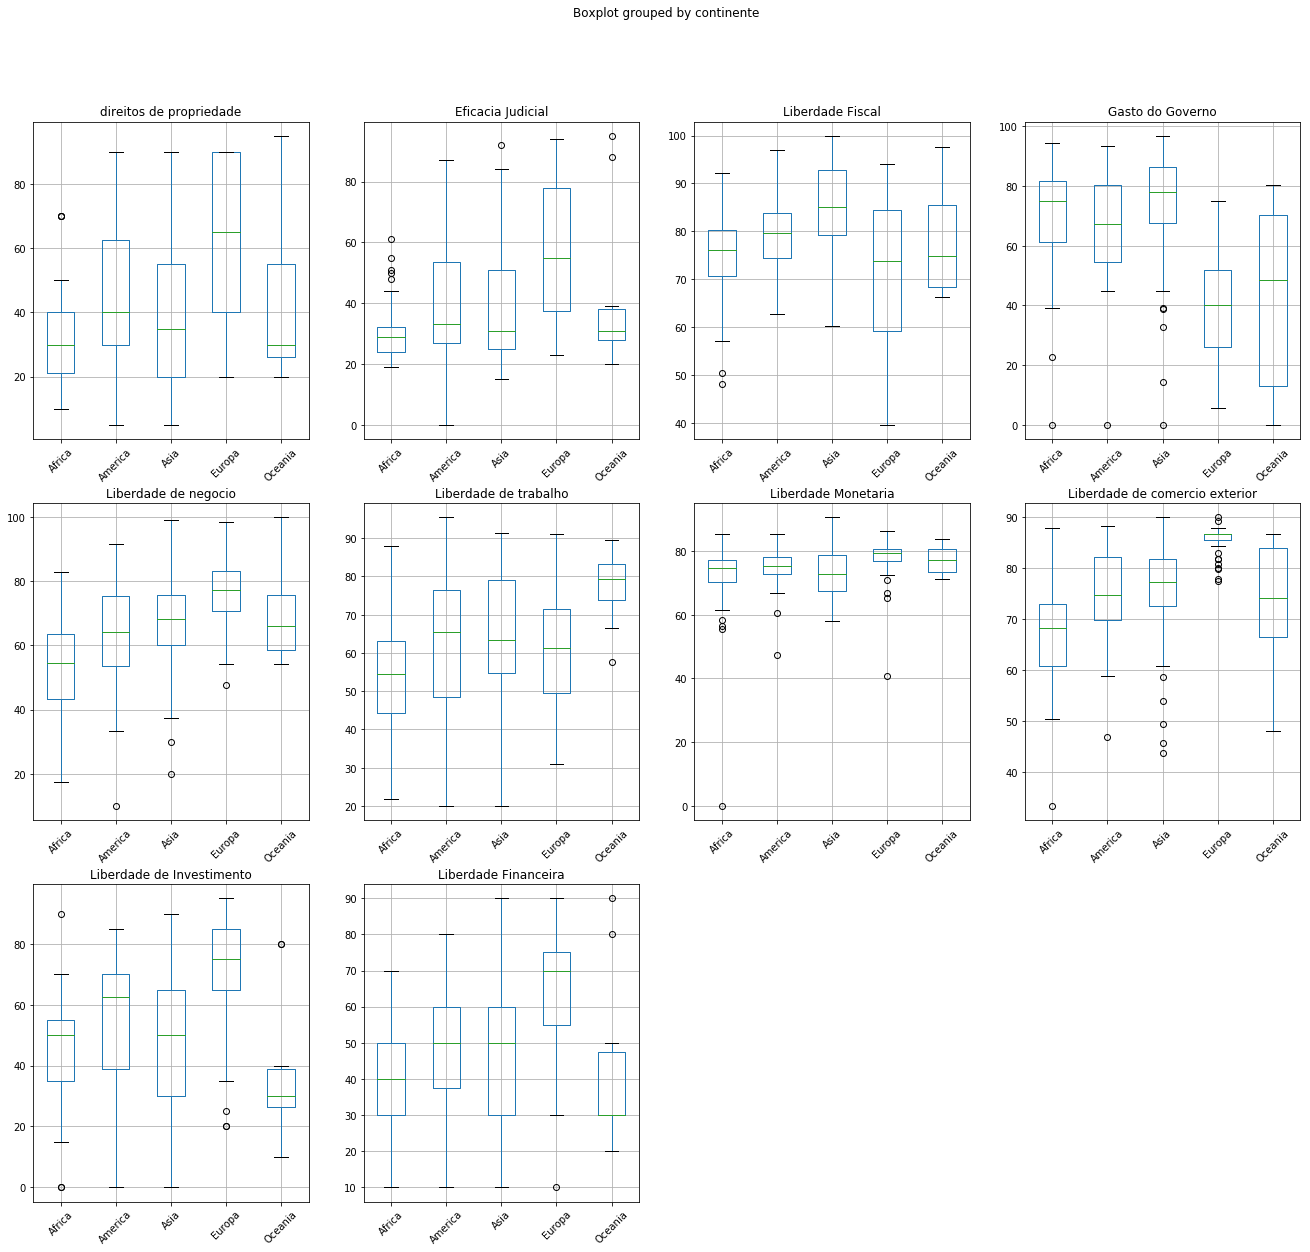

In [9]:
# boxplot das colunas do conjunto de dados agrupado por continente.
fig = plt.figure(figsize=(22, 20))
for i, column in enumerate(df.columns[2:]):
    ax = fig.add_subplot(3, 4, i+1)
    df.boxplot(column=column, rot=45, by='continente', ax=ax)
    ax.set_xlabel('')

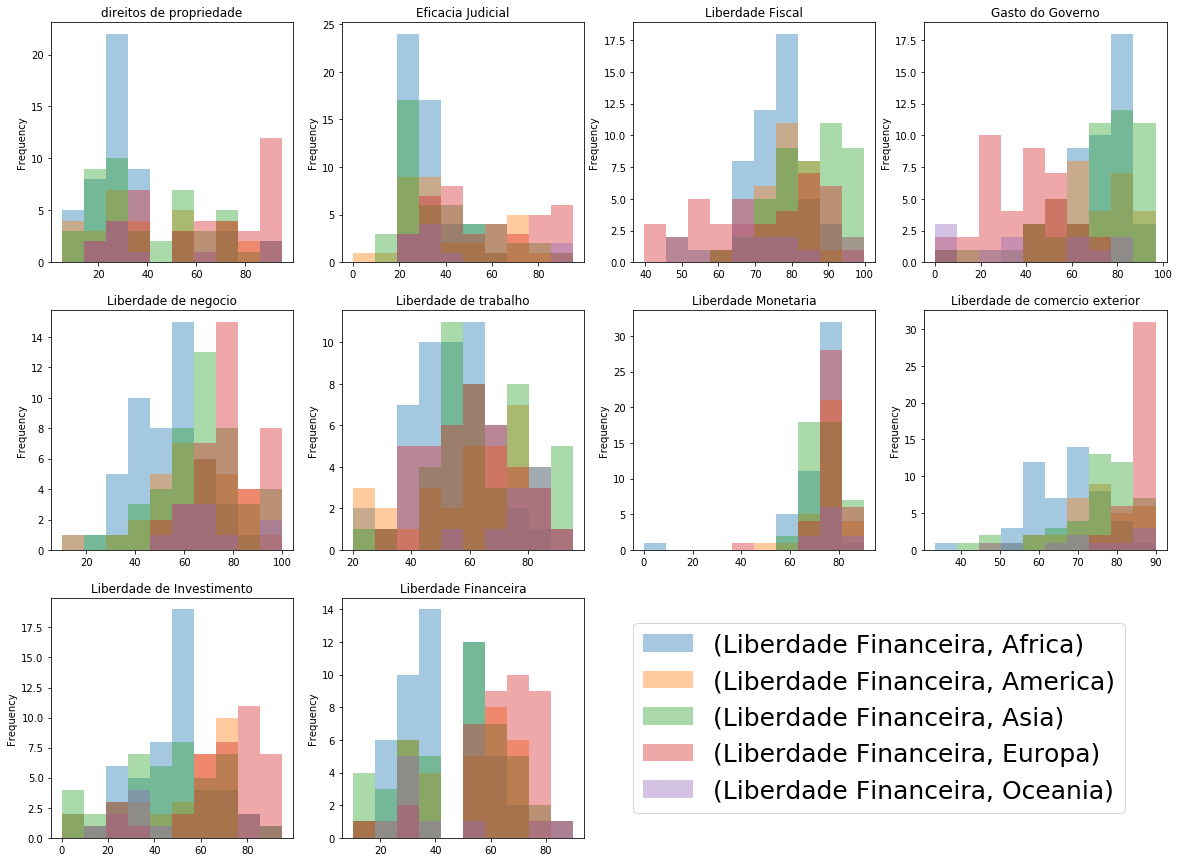

In [10]:
# histograma das colunas do conjunto de dados agrupado por continente.
fig = plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[2:]):
    ax = fig.add_subplot(3, 4, i+1)
    pd.concat([df.continente, df[column]], axis=1).pivot(columns='continente').plot.hist(bins=10, alpha=0.4, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)
    ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.5), prop={'size': 25})
    if(i != 9):
        ax.get_legend().remove()

In [12]:
# Normalizando o dataset para a aplicação do PCA.
df_scaled = pd.DataFrame(scale(df.iloc[:, 2:]), index=df.index, columns=df.columns[2:])
df_scaled['continente'] = df.continente.copy()
df_scaled['Pais'] = df.Pais.copy()

/home/martinelli/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [13]:
# Dataset normalizado.
df_scaled.describe()

,direitos de propriedade,Eficacia Judicial,Liberdade Fiscal,Gasto do Governo,Liberdade de negocio,Liberdade de trabalho,Liberdade Monetaria,Liberdade de comercio exterior,Liberdade de Investimento,Liberdade Financeira
count,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02,1.760000e+02
mean,6.055762e-17,6.055762e-17,-2.800790e-16,4.440892e-16,-4.642751e-16,-1.009294e-16,-4.844610e-16,1.211152e-15,2.523234e-17,1.614870e-16
std,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00,1.002853e+00
min,-1.597514e+00,-1.941295e+00,-3.140074e+00,-2.585765e+00,-3.139896e+00,-2.486326e+00,-8.266139e+00,-3.730582e+00,-2.242666e+00,-2.054429e+00
25%,-5.623062e-01,-7.508144e-01,-5.221744e-01,-6.217547e-01,-6.254075e-01,-6.933833e-01,-2.609852e-01,-6.127977e-01,-7.475552e-01,-1.001796e+00
50%,-1.482230e-01,-3.936702e-01,1.168404e-01,2.076343e-01,5.464726e-02,4.899504e-02,1.518241e-01,1.806974e-01,1.067936e-01,5.083740e-02
75%,6.799435e-01,4.872853e-01,6.466042e-01,7.970478e-01,6.704112e-01,7.777099e-01,5.813689e-01,9.090046e-01,7.475552e-01,5.771540e-01
max,2.129235e+00,2.582531e+00,1.831874e+00,1.489609e+00,1.997661e+00,2.098506e+00,1.842111e+00,1.358577e+00,1.815491e+00,2.156104e+00


In [14]:
df_scaled.cov()

,direitos de propriedade,Eficacia Judicial,Liberdade Fiscal,Gasto do Governo,Liberdade de negocio,Liberdade de trabalho,Liberdade Monetaria,Liberdade de comercio exterior,Liberdade de Investimento,Liberdade Financeira
direitos de propriedade,1.005714,0.932415,-0.272278,-0.307339,0.708460,0.374266,0.501772,0.494678,0.707543,0.743589
Eficacia Judicial,0.932415,1.005714,-0.312878,-0.351178,0.665944,0.326648,0.417722,0.460239,0.613651,0.652927
Liberdade Fiscal,-0.272278,-0.312878,1.005714,0.435002,-0.041257,0.145172,-0.086329,-0.051298,-0.186737,-0.089271
Gasto do Governo,-0.307339,-0.351178,0.435002,1.005714,-0.255576,-0.103541,-0.059591,-0.185766,-0.138331,-0.124403
Liberdade de negocio,0.708460,0.665944,-0.041257,-0.255576,1.005714,0.439675,0.377178,0.491574,0.584321,0.607439
Liberdade de trabalho,0.374266,0.326648,0.145172,-0.103541,0.439675,1.005714,0.259993,0.223410,0.241982,0.311473
Liberdade Monetaria,0.501772,0.417722,-0.086329,-0.059591,0.377178,0.259993,1.005714,0.378332,0.553638,0.526819
Liberdade de comercio exterior,0.494678,0.460239,-0.051298,-0.185766,0.491574,0.223410,0.378332,1.005714,0.610426,0.602613
Liberdade de Investimento,0.707543,0.613651,-0.186737,-0.138331,0.584321,0.241982,0.553638,0.610426,1.005714,0.822553
Liberdade Financeira,0.743589,0.652927,-0.089271,-0.124403,0.607439,0.311473,0.526819,0.602613,0.822553,1.005714


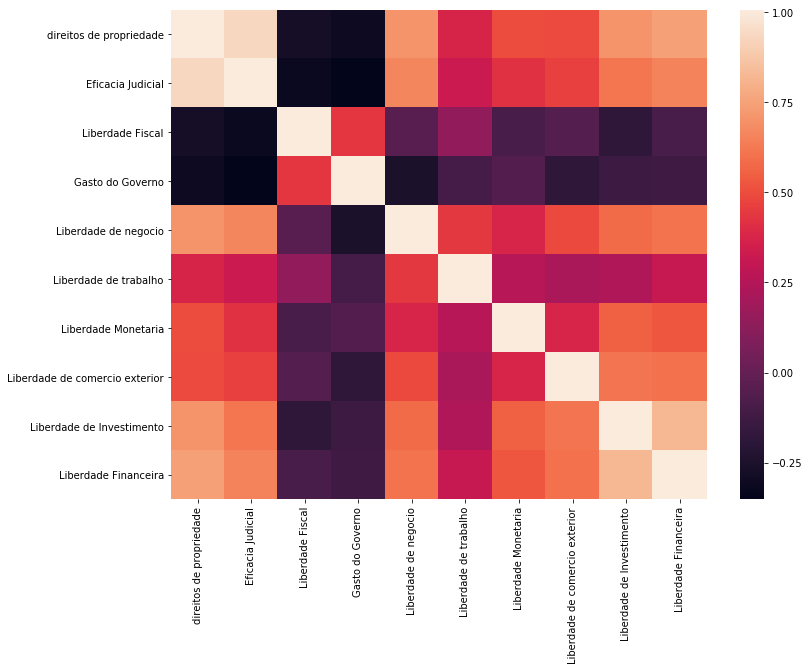

In [15]:
## verificando a covariância entre as covariáveis.
fig, ax = plt.subplots(figsize=(12,9)) 
sns.heatmap(df_scaled.cov(), ax=ax)

In [16]:
df_scaled.corr()

,direitos de propriedade,Eficacia Judicial,Liberdade Fiscal,Gasto do Governo,Liberdade de negocio,Liberdade de trabalho,Liberdade Monetaria,Liberdade de comercio exterior,Liberdade de Investimento,Liberdade Financeira
direitos de propriedade,1.000000,0.927117,-0.270731,-0.305592,0.704434,0.372139,0.498921,0.491867,0.703523,0.739364
Eficacia Judicial,0.927117,1.000000,-0.311100,-0.349182,0.662160,0.324792,0.415348,0.457624,0.610165,0.649217
Liberdade Fiscal,-0.270731,-0.311100,1.000000,0.432530,-0.041022,0.144347,-0.085839,-0.051006,-0.185676,-0.088763
Gasto do Governo,-0.305592,-0.349182,0.432530,1.000000,-0.254124,-0.102952,-0.059252,-0.184711,-0.137545,-0.123696
Liberdade de negocio,0.704434,0.662160,-0.041022,-0.254124,1.000000,0.437177,0.375035,0.488781,0.581001,0.603987
Liberdade de trabalho,0.372139,0.324792,0.144347,-0.102952,0.437177,1.000000,0.258516,0.222141,0.240607,0.309703
Liberdade Monetaria,0.498921,0.415348,-0.085839,-0.059252,0.375035,0.258516,1.000000,0.376182,0.550492,0.523825
Liberdade de comercio exterior,0.491867,0.457624,-0.051006,-0.184711,0.488781,0.222141,0.376182,1.000000,0.606957,0.599189
Liberdade de Investimento,0.703523,0.610165,-0.185676,-0.137545,0.581001,0.240607,0.550492,0.606957,1.000000,0.817879
Liberdade Financeira,0.739364,0.649217,-0.088763,-0.123696,0.603987,0.309703,0.523825,0.599189,0.817879,1.000000


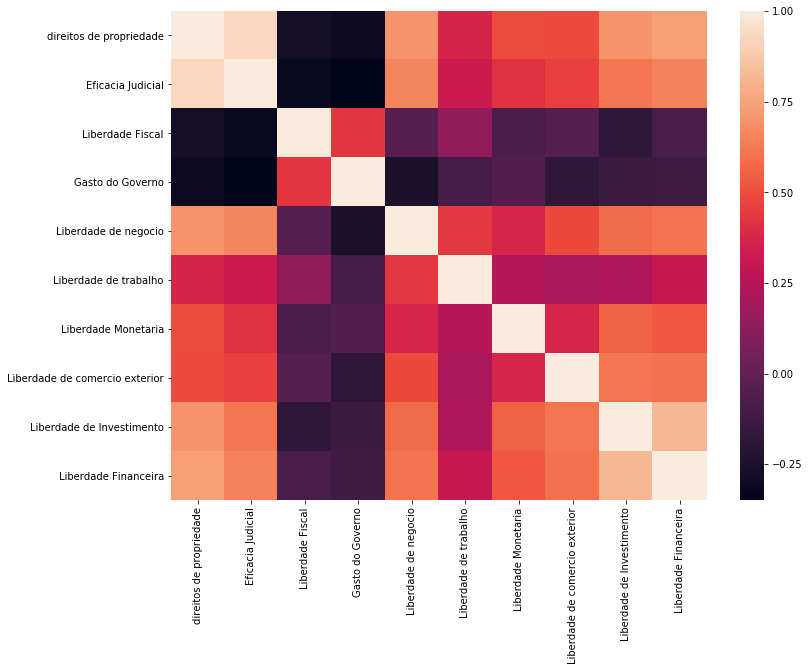

In [17]:
# verificando a correlação entre as covariáveis.
fig, ax = plt.subplots(figsize=(12,9)) 
sns.heatmap(df_scaled.corr(), ax=ax)

## Aplicando PCA no dataset normalizado para verificar a variância cumulativa de cada componente principal.

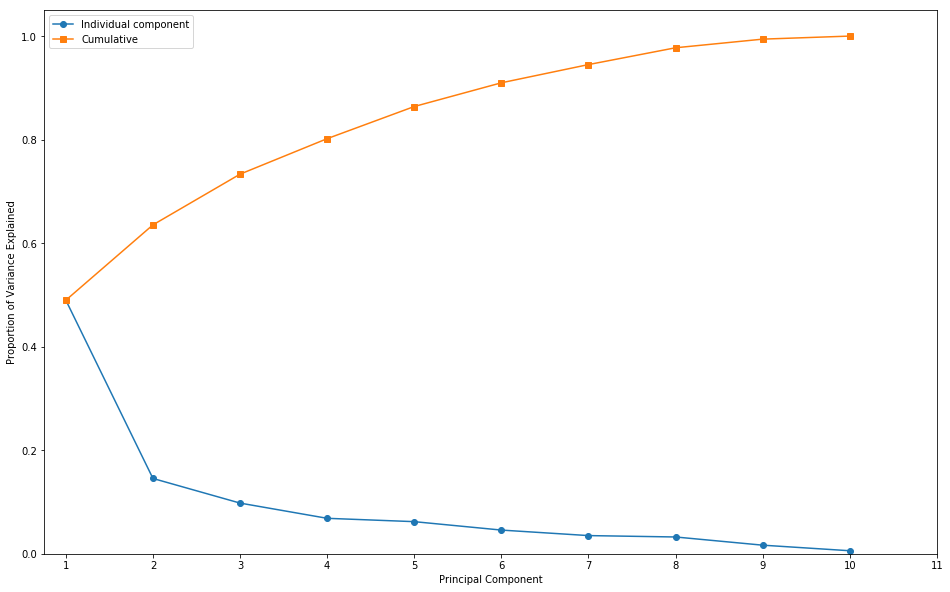

In [18]:
pca = PCA()
pca.fit_transform(df_scaled.iloc[:, :-2])
plt.figure(figsize=(16, 10))

plt.plot(np.arange(1,pca.n_components_+1), pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(np.arange(1,pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks(np.arange(1,pca.n_components_+2))
plt.legend(loc=2);

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.48985082, 0.63536742, 0.7333127 , 0.80186198, 0.86395306,
       0.9097751 , 0.94494892, 0.97743475, 0.99409774, 1.        ])

In [20]:
# Aplicando o PCA para a geração do gráfico dos dois primeiros componentes.
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(df.iloc[:, 2:]), columns=['PC'+str(i+1) for i in range(10)], index=df.index)

## Aqui podemos analisar como é formado cada componente, tornando possível a identificação da correlação entre as componentes e variáveis originais.

In [21]:
# The loading vectors
pca_loadings = pd.DataFrame(pca.fit(df_scaled.iloc[:, :-2]).components_.T, index=df_scaled.columns[:-2],
                            columns=['PC'+str(i+1) for i in range(pca.n_components_)])
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
direitos de propriedade,-0.414033,0.081286,0.061156,-0.132445,0.322398,0.096037,-0.090607,0.291683,0.075602,0.767150
Eficacia Judicial,-0.389484,0.160199,0.106505,-0.098126,0.387161,0.123744,-0.240820,0.416107,0.105455,-0.627854
Liberdade Fiscal,0.110358,-0.686459,0.191208,0.275065,0.012711,0.531333,0.171313,0.272496,0.135197,-0.004013
Gasto do Governo,0.153008,-0.582100,-0.357534,-0.259311,0.433932,-0.374184,-0.324839,-0.090588,-0.023555,-0.009130
Liberdade de negocio,-0.357865,-0.089221,0.272140,0.158490,0.216165,0.264916,-0.229996,-0.764540,-0.098154,-0.028829
Liberdade de trabalho,-0.202835,-0.284696,0.699932,-0.249540,-0.252151,-0.502329,0.067705,0.056260,0.035755,-0.026250
Liberdade Monetaria,-0.283005,-0.162286,-0.274009,-0.584970,-0.548606,0.357703,-0.206056,-0.028467,-0.052158,-0.037291
Liberdade de comercio exterior,-0.309444,-0.114684,-0.196619,0.625971,-0.373946,-0.255944,-0.474665,0.167256,-0.018624,0.040262
Liberdade de Investimento,-0.381715,-0.084208,-0.314350,0.052642,-0.008053,-0.165519,0.462431,-0.195423,0.678401,-0.076773
Liberdade Financeira,-0.387975,-0.148559,-0.209773,0.075736,0.080821,-0.098820,0.509742,0.068214,-0.700088,-0.082184


## Agora vamos plotar as variáveis do conjunto de dados com relação aos dois primeiros componentes gerados e às covariaveis.

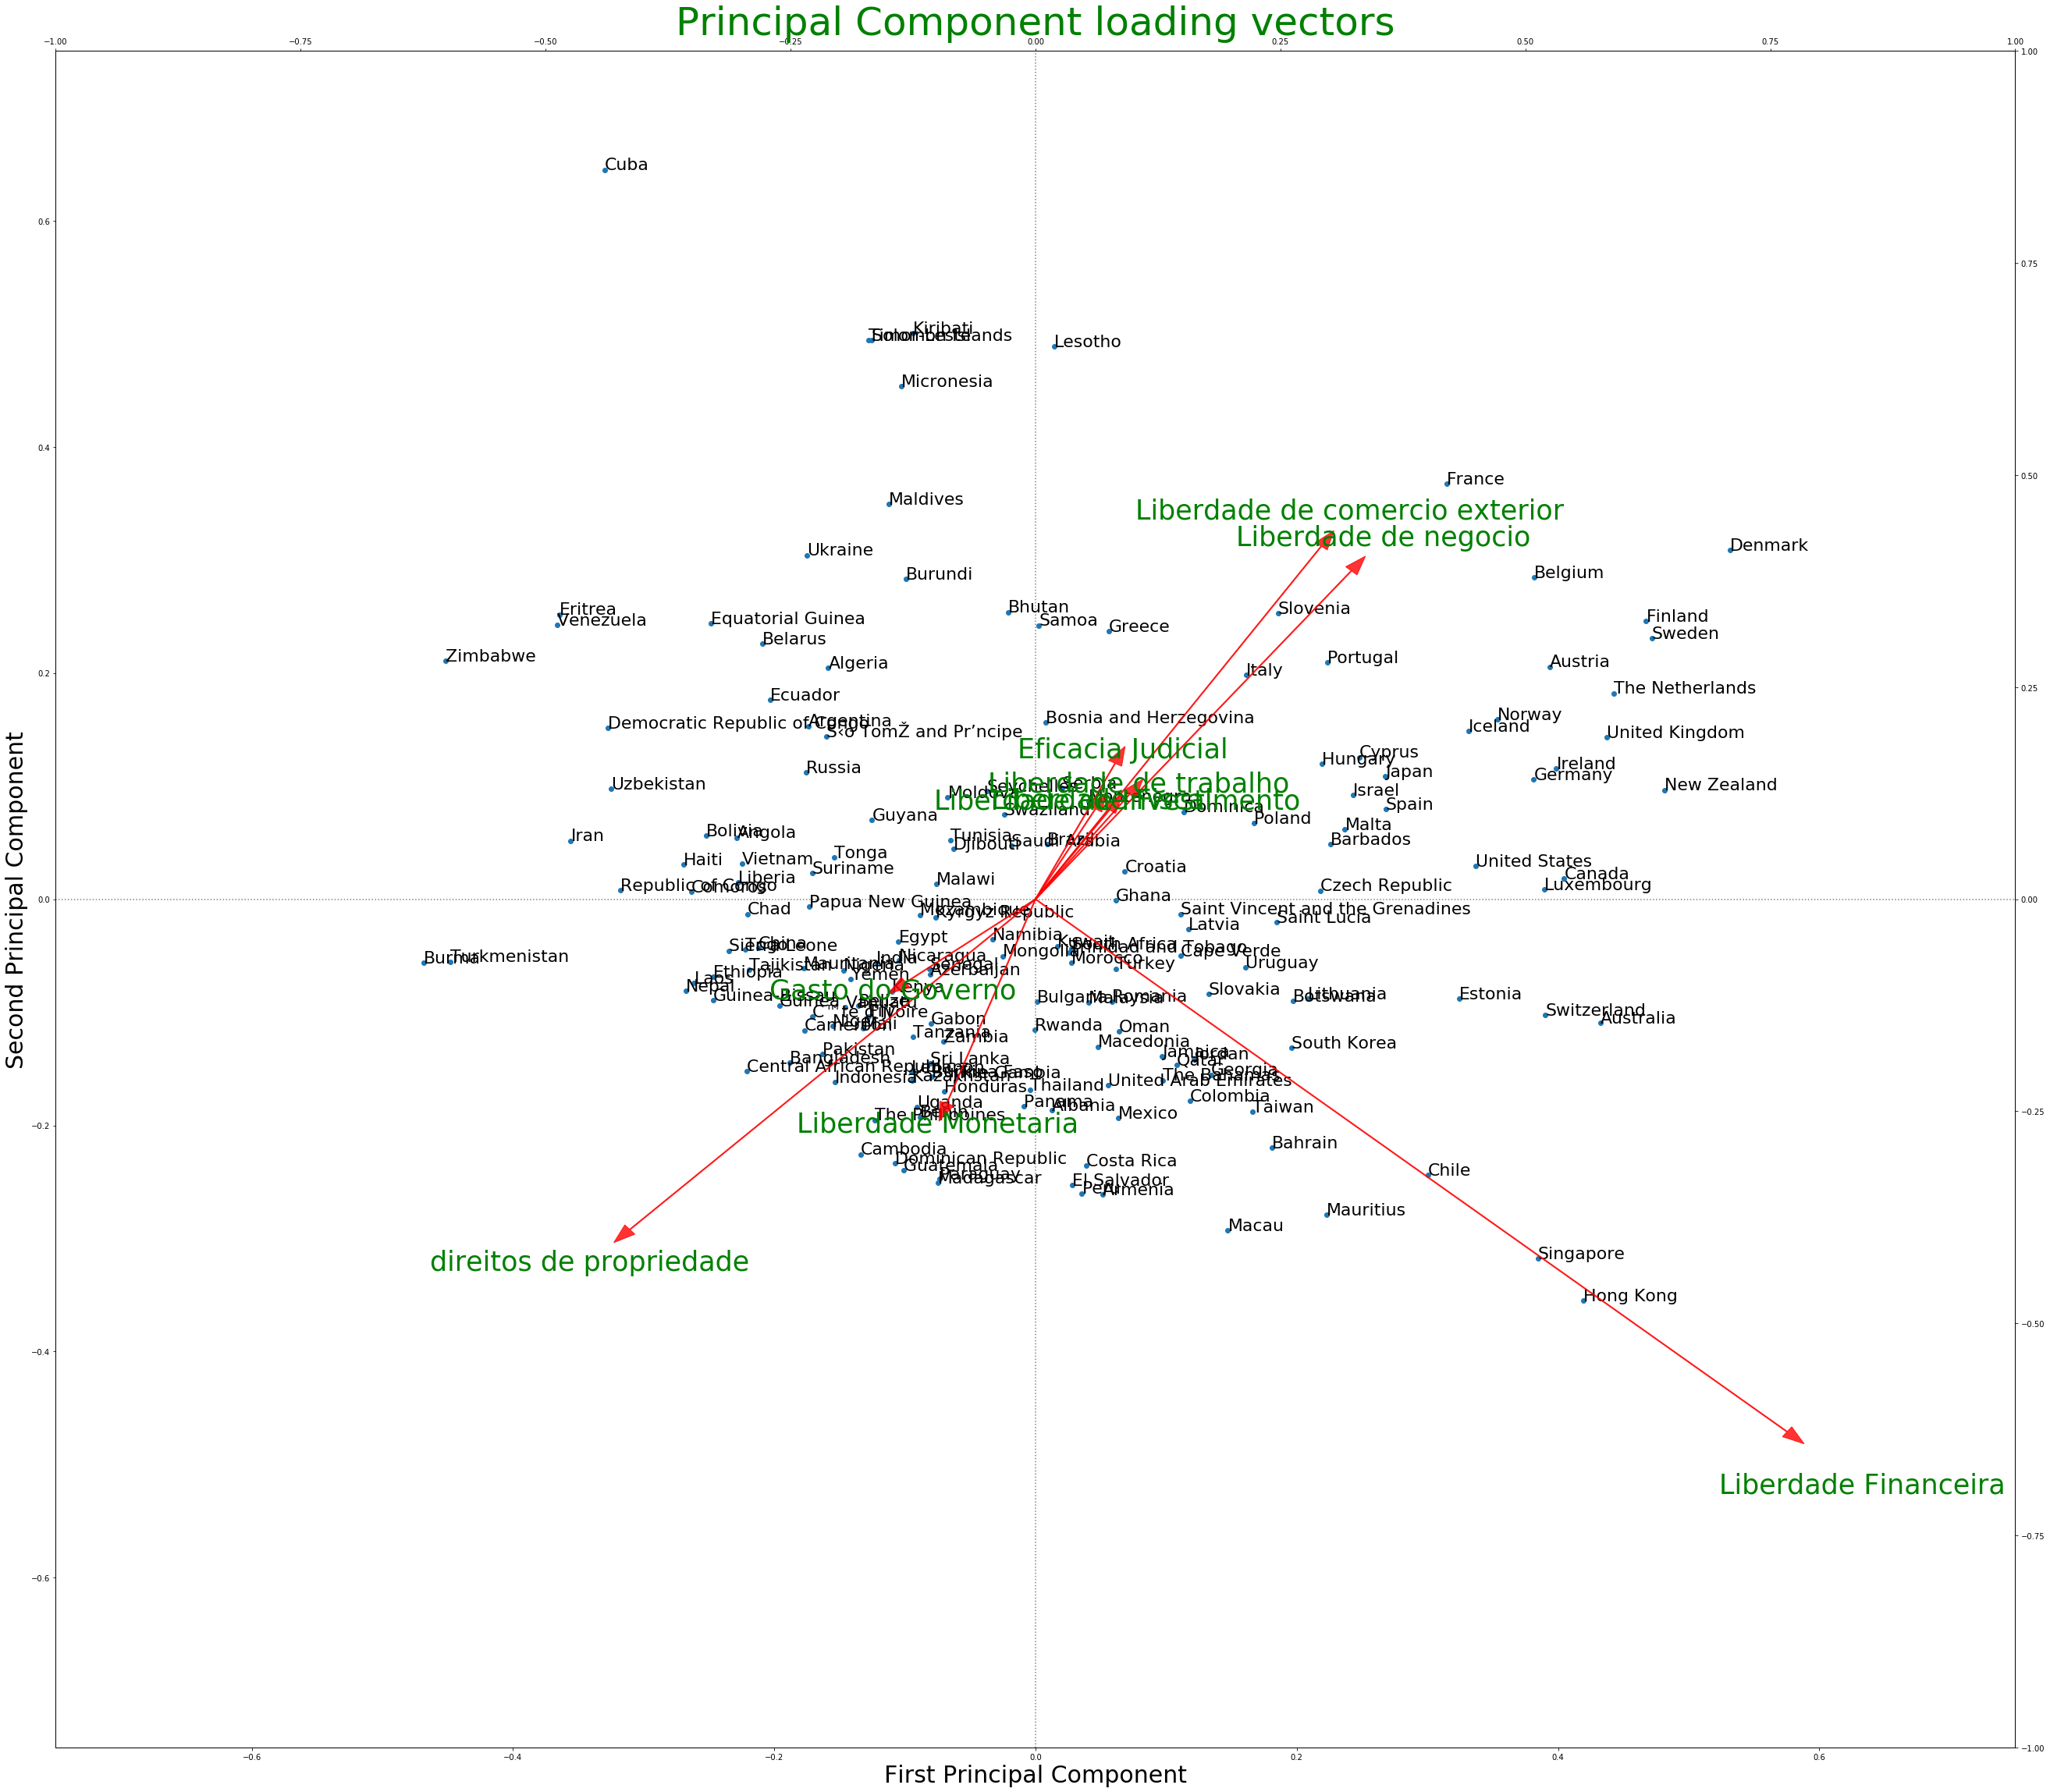

In [42]:
fig , ax1 = plt.subplots(figsize=(45, 40))

lim=0.75
ax1.set_xlim(-lim,lim)
ax1.set_ylim(-lim,lim)

# Plot reference lines
ax1.hlines(0,-lim,lim, linestyles='dotted', colors='grey')
ax1.vlines(0,-lim,lim, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component', fontsize=30)
ax1.set_ylabel('Second Principal Component', fontsize=30)
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='g')
ax2.set_xlabel('Principal Component loading vectors', color='g', fontsize=50)

xs = df_plot.iloc[:, 0]
ys = df_plot.iloc[:, 1]

coeff = pca.components_
labels = df.columns[2:]

scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())

ax1.scatter(xs*scalex, ys*scaley)
for i, country in enumerate(df.Pais):
    ax1.annotate(country, (xs[i]*scalex, ys[i]*scaley), fontsize=22)

for i in range(pca.n_components_):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1],color='r',alpha=0.8, head_width=0.015) 
        if labels is None:
            plt.text(coeff[i, 0]* 1.1, coeff[i, 1] * 1.1, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=35)
        else:
            plt.text(coeff[i, 0]* 1.1, coeff[i, 1] * 1.1, labels[i], color='g', ha='center', va='center', fontsize=35)

In [34]:
df_final = pd.DataFrame(pca.fit_transform(df_scaled.iloc[:, :-2])[:, 0]*-1, columns=['Indice de liberdade economica'])
df_final['Pais'] = df.Pais.values

In [38]:
df_final.sort_values(by=['Indice de liberdade economica'], ascending=False)

,Indice de liberdade economica,Pais
128,5.425637,Denmark
167,4.895032,New Zealand
135,4.687029,Sweden
166,4.574613,Australia
82,4.409062,Hong Kong
133,4.362242,Finland
134,4.296675,The Netherlands
127,4.181324,Switzerland
131,4.141178,United Kingdom
83,4.133650,Singapore
